   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00


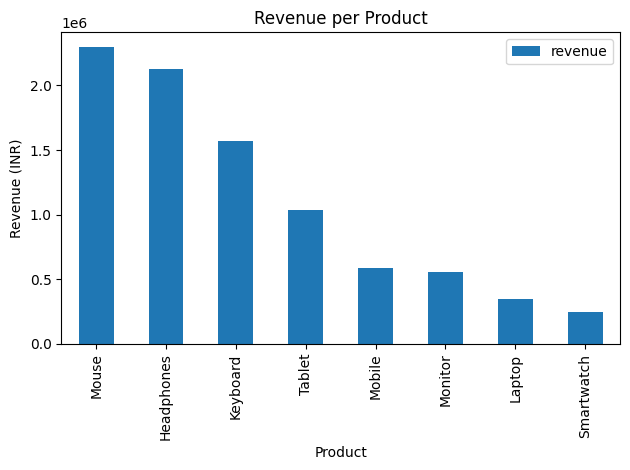

'Task7_SQL_Chart_Output_Detailed.pdf'

In [ ]:
# ------------------- IMPORTS -------------------
!pip install reportlab
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, TableStyle, Spacer, Image
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
import random


# ------------------- STEP 1: CREATE DATASET -------------------
conn = sqlite3.connect("sales_data_large.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""CREATE TABLE sales (product TEXT, quantity INTEGER, price REAL)""")

products = ["Laptop", "Mobile", "Headphones", "Tablet", "Smartwatch", "Keyboard", "Mouse", "Monitor"]
prices = {"Laptop":55000,"Mobile":15000,"Headphones":2000,"Tablet":22000,"Smartwatch":7000,"Keyboard":1500,"Mouse":800,"Monitor":12000}

data = [(random.choice(products), random.randint(1,10), prices[random.choice(products)]) for _ in range(120)]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()


# ------------------- STEP 2: SQL QUERY -------------------
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales GROUP BY product ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)
df


# ------------------- STEP 3: BAR CHART -------------------
df.plot(kind="bar", x="product", y="revenue")
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
chart_name = "sales_chart_final.png"
plt.savefig(chart_name)
plt.show()


# ------------------- STEP 4: CREATE PDF -------------------
pdf_name = "Task7_SQL_Chart_Output_Detailed.pdf"
styles = getSampleStyleSheet()
doc = SimpleDocTemplate(pdf_name, pagesize=A4)
elements = []

elements.append(Paragraph("<b><font size=18>Sales Analysis Report</font></b>", styles['Title']))
elements.append(Spacer(1, 12))

elements.append(Paragraph(
    "This detailed report contains analysis performed on a dataset of more than 120 records. "
    "The SQL query summarizes total quantity sold and total revenue generated for each product.",
styles['Normal']))
elements.append(Spacer(1, 20))

table_data = [["Product", "Total Quantity", "Revenue"]] + df.values.tolist()
table = Table(table_data)
table.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.lightgrey),
    ("GRID", (0,0), (-1,-1), 1, colors.black),
    ("FONTNAME", (0,0), (-1,0), "Helvetica-Bold"),
]))
elements.append(table)
elements.append(Spacer(1, 20))

elements.append(Paragraph("<b>Revenue Visualization Chart</b>", styles['Heading2']))
elements.append(Image(chart_name, width=400, height=260))
elements.append(Spacer(1, 20))

elements.append(Paragraph(
    "<i>Generated using Python, SQLite, Pandas and Matplotlib in Google Colab.</i>",
styles['Italic']))

doc.build(elements)

